In [61]:
import pandas as pd
import numpy as np

np.random.seed(42)  # For reproducibility
c1=100
hours_studied = np.random.randint(1, 13, size=c1)
# Generate Hours_Slept roughly inversely related to Hours_Studied, plus some noise
hours_slept = 10 - hours_studied + np.random.randint(-1, 2, size=c1)
hours_slept = np.clip(hours_slept, 2, 8)  # Keep sleep hours between 2 and 8
# Passed = 1 if studied more than 6 hours, else 0, plus some randomness
passed = (hours_studied > 6).astype(int)
# Add some noise in labels to make it realistic
noise_idx = np.random.choice(c1, size=5, replace=False)
passed[noise_idx] = 1 - passed[noise_idx]
data = {
    'Hours_Studied': hours_studied,
    'Hours_Slept': hours_slept,
    'Passed': passed
}

df = pd.DataFrame(data)
print(df.head(10))  # Show first 10 rows


   Hours_Studied  Hours_Slept  Passed
0              7            2       1
1              4            7       0
2             11            2       1
3              8            2       1
4              5            6       0
5              7            4       1
6             10            2       1
7              3            6       0
8              7            4       1
9             11            2       1


In [62]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,0:2]
y=df.iloc[:,2]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 2)
(20, 2)
(80,)
(20,)


let us create an graph to show the data points

In [63]:
!pip install matplotlib-venn

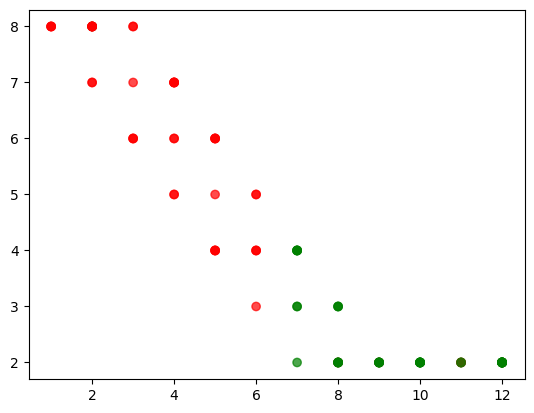

In [64]:
import matplotlib.pyplot as plt
colors = df['Passed'].map({0: 'red', 1: 'green'})
plt.scatter(df['Hours_Studied'], df['Hours_Slept'], c=colors, alpha=0.7)

In [65]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.95

In [66]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1])

making the predition on a random number let us suppose it to be 15

let the hurs sleep it to 9

In [67]:
specific_study=15
specific_sleep=9
new_data_point=pd.DataFrame({'Hours_Studied':[specific_study],'Hours_Slept':[specific_sleep]})
prediction=model.predict(new_data_point)
c=prediction[0]
c

np.int64(1)

making a confustion metrix

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[11,  1],
       [ 0,  8]])

making the classification report

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

